In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Create synthetic Greyscale Images

To try a simple one first, I created a basic square and projected in 3d.

In [4]:
N = 256 #defines the image resolution, computationally efficient if set to 2^N

# Create grid
xx = np.linspace(-1, 1, N)
X, Y = np.meshgrid(xx, xx) # both X and Y are NxN arrays with X and Y coordinates from [-1,1] centered at (0,0)
S = np.sqrt(X**2 + Y**2)  # Euclidean distance formula; This calculates the distance of each point from the center
A = np.zeros(np.shape(S)) # initializes an array with shame same as S

#set certain regions
A[0, :] = 1
A[-1, :] = 1
A[:, 0] = 1
A[:, -1] = 1

#set the central part
A[2:-2, 2:-2] = 0

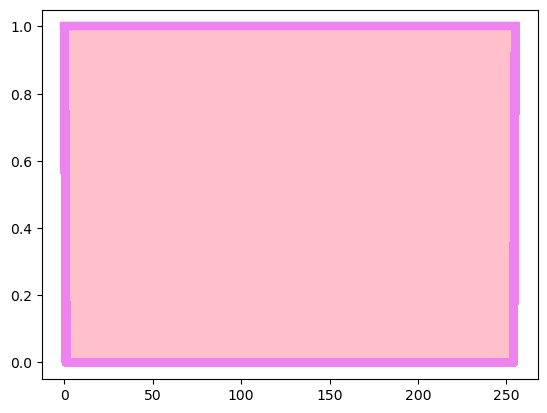

<Figure size 2000x800 with 0 Axes>

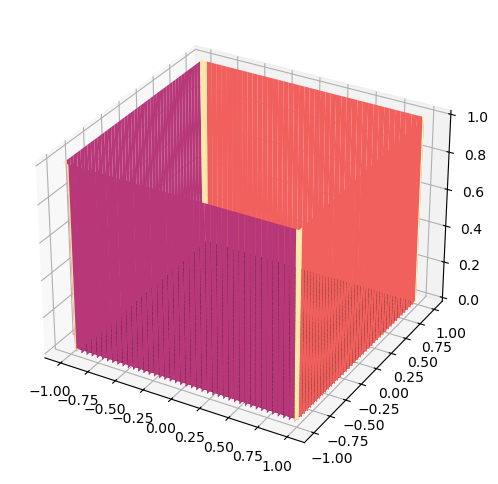

In [5]:
fig, ax = plt.subplots()
fig = plt.figure(figsize=(10, 4), dpi=200)


ax.fill(A, color='pink')
ax.plot(A, color='violet', linewidth=6)
plt.show()

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,A,cmap='magma')
plt.show()

Simulate a 1 cm x 1 cm optical element with a sinusoid along the x-direction with a given frequency-- generate images with frequencies of 1, 3, and 5 cycles/cm. The size of each image should be 400x400 pixels.

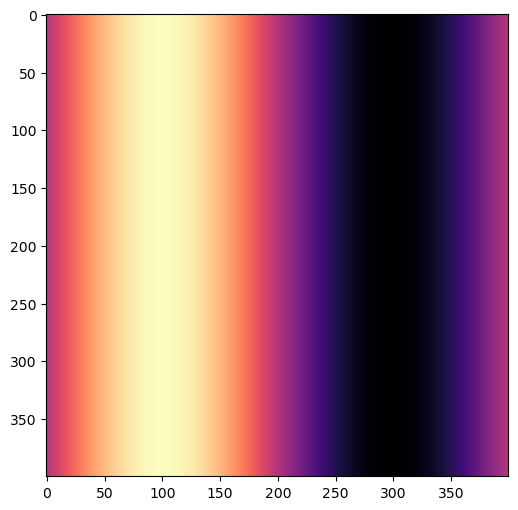

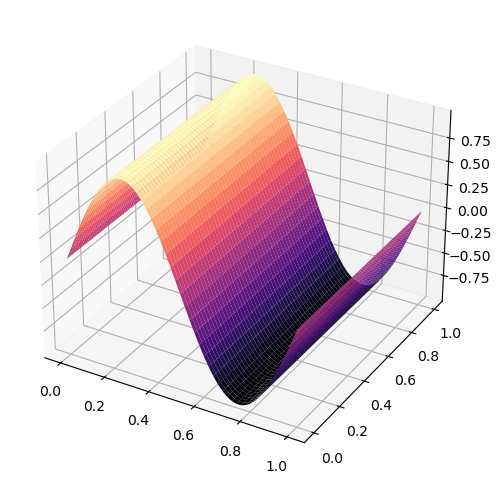

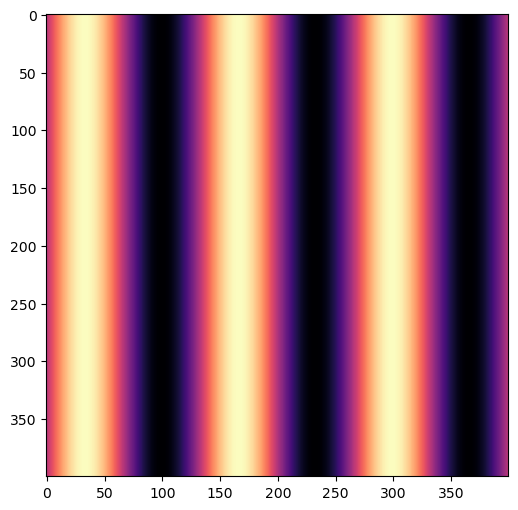

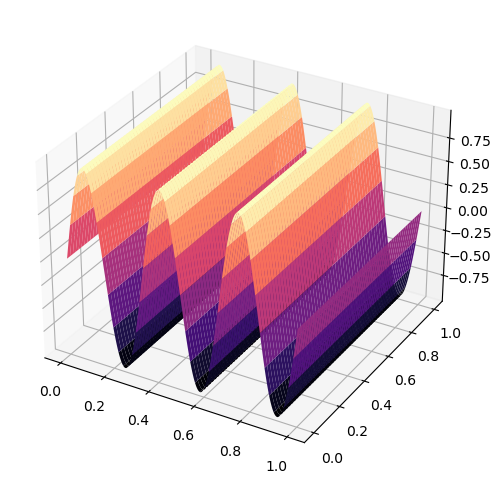

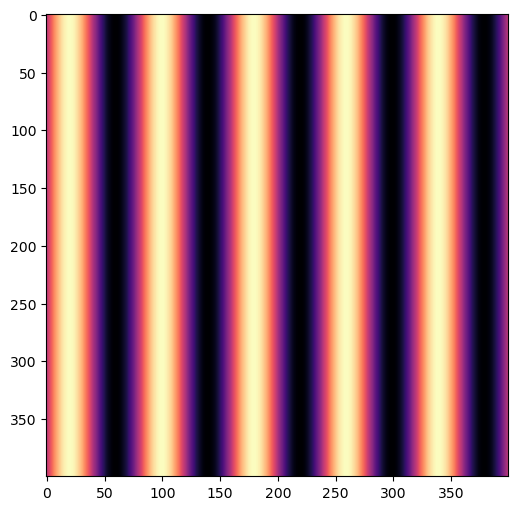

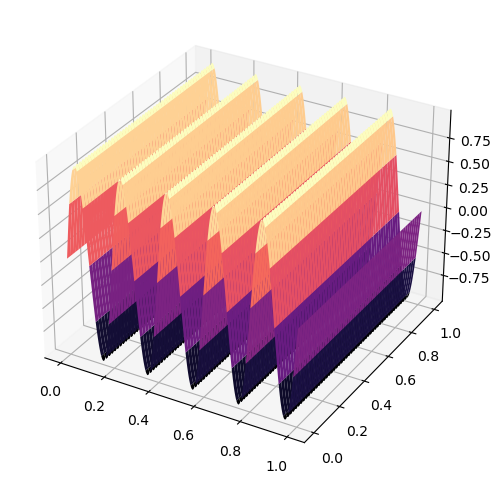

In [4]:
spatial_res = 400

x=np.linspace(0,1,spatial_res)
y=np.linspace(0,1,spatial_res)

X,Y =np.meshgrid(x,y)

#create a function that generates a heatmap visualization of the sinusoidal pattern
def heatmap(freq):    
    sinusoid = np.sin(2 * np.pi * freq * X)

    scaled = 127.5 + 127.5*sinusoid

    plt.figure(figsize=(6,6))
    plt.imshow(scaled, cmap='magma', vmin=0,vmax=255)
    plt.show()

#create a function that generates a 3d plot of the sinusoidal pattern
def make_3d_plot(freq):    
    sinusoid = np.sin(2 * np.pi * freq * X)
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X,Y,sinusoid,cmap='magma')
    plt.show()

frequency = [1,3,5]

#create a loop that calls the functions above and iterates over each given frequency
for freq in frequency:
    heatmap(freq)
    make_3d_plot(freq)

Color Images

Recreate the Olympics logo as an image. It is fine if the colors overlap where the rings intersect.

For the first one, I created separate circles just for trial.

For the second one, I used "for loop" to create the desired image quicker.

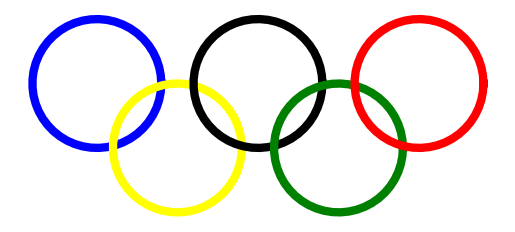

In [21]:
fig, ax = plt.subplots()
ax.set_aspect('equal', adjustable='box')
ax.axis('off')

theta = np.linspace(0, 2*np.pi, 50)

x_blue = -50 + 20 * np.cos(theta)
y_blue = 0 + 20 * np.sin(theta)
ax.fill(x_blue, y_blue, color="white")
ax.plot(x_blue, y_blue, color="blue", linewidth=6)

x_yellow = -25 + 20 * np.cos(theta)
y_yellow = -20 + 20 * np.sin(theta)
ax.fill(x_yellow, y_yellow, color="white")
ax.plot(x_yellow, y_yellow, color="yellow", linewidth=6)

x_black = 0 + 20 * np.cos(theta)
y_black = 0 + 20 * np.sin(theta)
ax.fill(x_black, y_black, color="white")
ax.plot(x_black, y_black, color="black", linewidth=6)

x_green = 25 + 20 * np.cos(theta)
y_green = -20 + 20 * np.sin(theta)
ax.fill(x_green, y_green, color="white")
ax.plot(x_green, y_green, color="green", linewidth=6)

x_red = 50 + 20 * np.cos(theta)
y_red = 0 + 20 * np.sin(theta)
ax.fill(x_red, y_red, color="white")
ax.plot(x_red, y_red, color="red", linewidth=6)


plt.savefig("olympic rings.png", bbox_inches='tight', pad_inches=0, transparent=True)
plt.show()

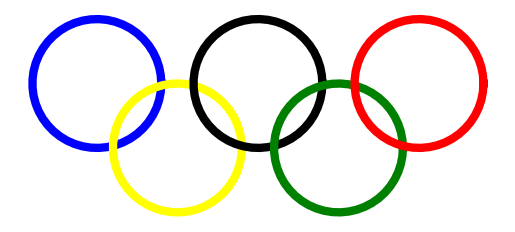

In [12]:
colors = ['blue', 'yellow', 'black', 'green', 'red']

x_positions = [-50, -25, 0, 25, 50]
y_positions = [0, -20, 0, -20, 0]
radius = 20

fig, ax = plt.subplots()
ax.set_aspect('equal', adjustable='box')
ax.axis('off')

theta = np.linspace(0, 2*np.pi, 50)

for color, x_position, y_position in zip(colors, x_positions, y_positions):
    xring = x_position + radius*np.cos(theta)
    yring = y_position + radius * np.sin(theta)

    ax.fill(xring, yring, color='white')
    ax.plot(xring, yring, color=color, linewidth=6)

plt.savefig("olympics.png",  bbox_inches='tight', pad_inches=0, transparent=True)
plt.show()

## Apply image enhancement

Apply contrast stretching to an astronaut image.

Show the following:
1. Original and contrast-stretched image
2. Probability Distribution Function (PDF) plot showing curves for the original and contrast-stretched image
3. Cumulative Distribution Function (CDF) plot showing curves for the original and contrast-stretched image

Sample output is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/12-cPwAr7hVUPBKIthvcQgvqjvEOmwyxJ/view?usp=drive_link

#### Original and contrast-stretched image

The following code shows how we load, process, and visualize a grayscale image. This is important in image processing. Here, we will display both the high-contrast grayscale and low-contrast grayscale image of the astronaut with varying shades of gray, which shows the effect of contrast manipulation.

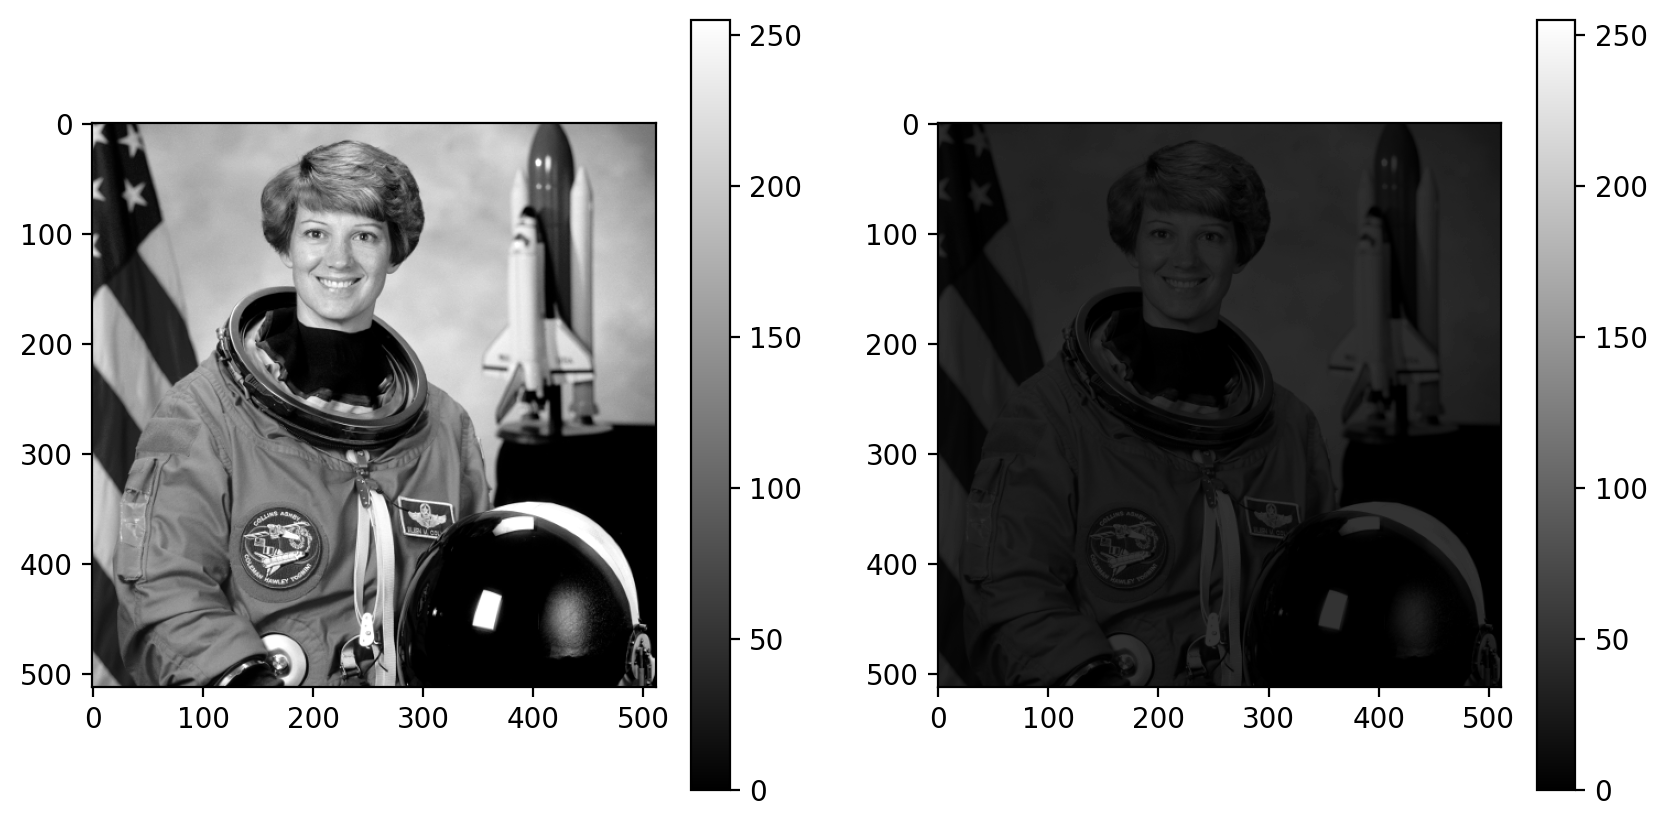

In [2]:
#This code for Contrast Stretching was the one provided

from skimage import color, data, exposure
from skimage.transform import rescale

img = color.rgb2gray(data.astronaut())*256 # original astronaut image
plt.figure(figsize=(10,5), dpi = 200)
plt.subplot(121)
plt.imshow(img, cmap = 'gray', vmax = 255)
plt.colorbar()

img_low_contrast = img/5 # low contrast astronaut image
plt.subplot(122)
plt.imshow(img_low_contrast, cmap = 'gray', vmax = 255)
plt.colorbar()

The following plots the histogram of pixel values for the low-contrast image. This helps in visualizing the distribution of the intensities of pixel in the image.

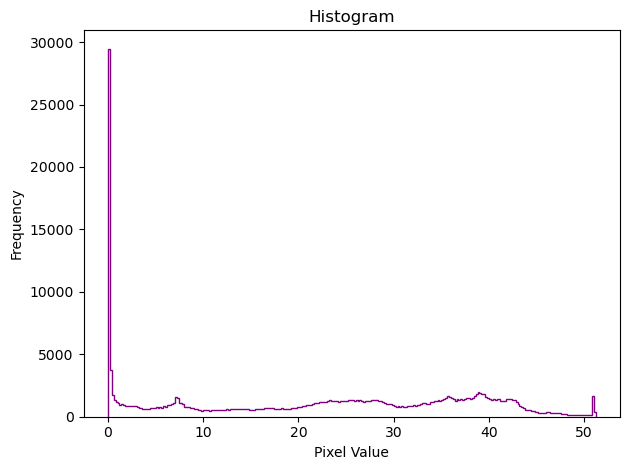

In [3]:
# histogram

plt.subplot(111)
plt.hist(img_low_contrast.ravel(), bins=256, histtype='step', color='purple') #histogram is displayed as a step curve
plt.title("Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

The histogram is skewed towards the lower pixel values because the image is mainly composed of darker shades, which is expected for a low contrast image.

### PDF and CDF

PDF: probability that a pixel has a specific intensity value
CDF: cumulative probability of intensities up to a specific value

These plots help in analyzing the brightness and contrast of an image as they show the distribution and cumulative distribution of pixel intensities.

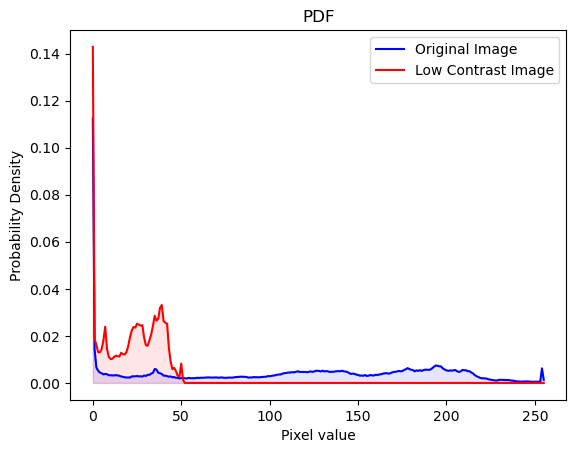

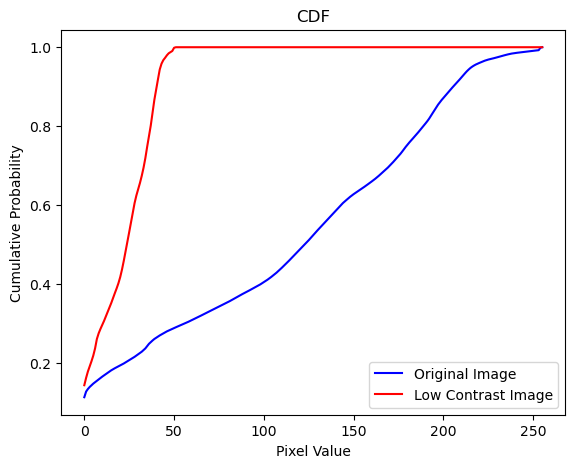

In [7]:
histogram_original, bins_original = np.histogram(img.ravel(), bins=256, range=(0,256))
histogram_low_contrast, bins_low_contrast = np.histogram(img_low_contrast.ravel(), bins=256, range=(0,256))

pdf_original = histogram_original/np.sum(histogram_original)
pdf_low_contrast = histogram_low_contrast/np.sum(histogram_low_contrast)

plt.subplot(111)
plt.plot(bins_original[:-1], pdf_original, color='blue', label='Original Image')
plt.fill_between(bins_original[:-1], pdf_original, color='blue', alpha=0.1)
plt.plot(bins_low_contrast[:-1], pdf_low_contrast, color='red', label='Low Contrast Image')
plt.fill_between(bins_low_contrast[:-1], pdf_low_contrast, color='red', alpha=0.1)
plt.title('PDF')
plt.xlabel('Pixel value')
plt.ylabel('Probability Density')
plt.legend()

cdf_original = np.cumsum(pdf_original)
cdf_low_contrast = np.cumsum(pdf_low_contrast)

plt.figure(figsize=(6.5,5))
plt.plot(bins_original[:-1], cdf_original, color='blue', label='Original Image')
plt.plot(bins_low_contrast[:-1], cdf_low_contrast, color='red', label='Low Contrast Image')

plt.title('CDF')
plt.xlabel('Pixel Value')
plt.ylabel('Cumulative Probability')
plt.legend()

##### PDF:
blue (original image):
    the wider spread means that there's a broader ranger of pixel 
    intensity values in the image

red (low contrast image):
    narrower curve since there's a compressed range of pixel 
    values; peak leans towards lower intensity values due to the 
    dark appearance of the image

##### CDF:

blue (original image):
    We can see an increasing curve since pixel intensities 
    accumulate darkest to brightest values. The slope is steep, 
    which means that there is a rapid change in pixel intensities 
    within the image.

red (low contrast image):
    There is a smaller range of intensities within the image, so 
    there is a slower increase in the curve